# Supervised Learning Classification
We will use a customer churn dataset from the telecom industry, which includes customer data such as long-distance usage, data usage, monthly revenue, types of offerings, and other services purchased by customers. We are using the subset of customers who have phone accounts. Since the data includes a mix of numeric, categorical, and ordinal variables, we will need to do some preprocessing.   
The Main objective of the analysis is to focus on the prediction of the customer churn rates utilizing different classification models. and the benefits of the analysis are to provide the idea of the customer who churn depending on the customer's behaviour.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns

In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/churndata_processed.csv")

In [3]:
data.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


In [4]:
data.columns

Index(['months', 'multiple', 'gb_mon', 'security', 'backup', 'protection',
       'support', 'unlimited', 'contract', 'paperless', 'monthly',
       'satisfaction', 'churn_value', 'payment_Credit Card',
       'payment_Mailed Check', 'internet_type_DSL',
       'internet_type_Fiber Optic', 'internet_type_None', 'offer_Offer A',
       'offer_Offer B', 'offer_Offer C', 'offer_Offer D', 'offer_Offer E'],
      dtype='object')

It is observed that dataset is related to customer's behaviour such as satisfaction, payment method, other services bought by the customers.

In [5]:
data.describe()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.433551,0.421837,0.241358,0.286668,0.344881,0.343888,0.290217,0.673719,0.377396,0.592219,...,0.390317,0.054664,0.234559,0.430924,0.216669,0.073832,0.116996,0.058924,0.085475,0.114298
std,0.398231,0.493888,0.240223,0.452237,0.475363,0.475038,0.453895,0.468885,0.424234,0.491457,...,0.487856,0.227340,0.423753,0.495241,0.412004,0.261516,0.321438,0.235499,0.279607,0.318195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.035294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,1.000000,0.317647,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Checking the null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   months                     7043 non-null   float64
 1   multiple                   7043 non-null   int64  
 2   gb_mon                     7043 non-null   float64
 3   security                   7043 non-null   int64  
 4   backup                     7043 non-null   int64  
 5   protection                 7043 non-null   int64  
 6   support                    7043 non-null   int64  
 7   unlimited                  7043 non-null   int64  
 8   contract                   7043 non-null   float64
 9   paperless                  7043 non-null   int64  
 10  monthly                    7043 non-null   float64
 11  satisfaction               7043 non-null   float64
 12  churn_value                7043 non-null   int64  
 13  payment_Credit Card        7043 non-null   int64

It is observed that there are 7043 items in each column and there is no null value. 
We will need to do details analysis of the dataset to identify which variables are binary, categorical and not ordinal, categorical and ordinal, and numeric. The non-numeric features will need to be encoded using methods such as LabelEncoder.

In [7]:
# Finding unique values
data_column = data.columns
data_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data_column], columns=['Variable', 'Unique Values']).set_index('Variable')
data_uniques

,Unique Values
Variable,
months,5
multiple,2
gb_mon,50
security,2
backup,2
protection,2
support,2
unlimited,2
contract,3


In [8]:
# Finding binary values
Condition = data_uniques[data_uniques['Unique Values'] == 2]
binary_variables = list(Condition.index)
binary_variables

['multiple',
 'security',
 'backup',
 'protection',
 'support',
 'unlimited',
 'paperless',
 'churn_value',
 'payment_Credit Card',
 'payment_Mailed Check',
 'internet_type_DSL',
 'internet_type_Fiber Optic',
 'internet_type_None',
 'offer_Offer A',
 'offer_Offer B',
 'offer_Offer C',
 'offer_Offer D',
 'offer_Offer E']

In [9]:
categorical_variables = list(data_uniques[(6 >= data_uniques['Unique Values']) & (data_uniques['Unique Values'] > 2)].index)
categorical_variables

['months', 'contract', 'satisfaction']

In [10]:
ordinal_variables = ['contract', 'satisfaction']

In [11]:
ordinal_variables

['contract', 'satisfaction']

In [12]:
data['months'].unique()

array([0.  , 0.25, 0.5 , 1.  , 0.75])

In [13]:
ordinal_variables.append('months')

In [14]:
numeric_variables = list(set(data.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

In [15]:
numeric_variables

['gb_mon', 'monthly']

In [16]:
#data['months'] = pd.cut(data['months'], bins=5)

In [17]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder 

In [18]:
lb, le = LabelBinarizer(), LabelEncoder()

In [19]:
for column in ordinal_variables:
    data[column] = le.fit_transform(data[column])

In [20]:
data[ordinal_variables].astype('category').describe()

,contract,satisfaction,months
count,7043,7043,7043
unique,3,5,5
top,0,2,0
freq,3610,2665,2470


In [21]:
for column in binary_variables:
    data[column] = lb.fit_transform(data[column])

In [22]:
categorical_variables = list(set(categorical_variables) - set(ordinal_variables))

In [23]:
# Taking care of categorical variables
data = pd.get_dummies(data, columns = categorical_variables, drop_first=True)

In [24]:
data.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0,0,0.094118,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0.200000,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
2,1,1,0.611765,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0.141176,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
4,2,1,0.164706,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0


In [25]:
data.columns

Index(['months', 'multiple', 'gb_mon', 'security', 'backup', 'protection',
       'support', 'unlimited', 'contract', 'paperless', 'monthly',
       'satisfaction', 'churn_value', 'payment_Credit Card',
       'payment_Mailed Check', 'internet_type_DSL',
       'internet_type_Fiber Optic', 'internet_type_None', 'offer_Offer A',
       'offer_Offer B', 'offer_Offer C', 'offer_Offer D', 'offer_Offer E'],
      dtype='object')

In [27]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [28]:
ordinal_variables + numeric_variables

['contract', 'satisfaction', 'months', 'gb_mon', 'monthly']

In [29]:
for column in [ordinal_variables + numeric_variables]:
    data[column] = mm.fit_transform(data[column])

Now, data is prossed with encoder, now we will need to separate X and target values y.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [31]:
# Set up X and y variables
y = data['churn_value']
X = data.drop(columns='churn_value')
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [32]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [33]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [34]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [35]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,0,0,0
1,0,0,0
2,0,0,0
3,1,1,1
4,1,1,1


In [36]:
y_prob.head()

,lr,l1,l2
0,0.744131,0.746804,0.753631
1,0.998778,0.999994,0.999999
2,0.999966,1.000000,1.000000
3,0.985633,0.999999,1.000000
4,0.999056,1.000000,1.000000


For each model, calculating the following error metrics:

*   Accuracy
*   Precision
*   Recall
*   F-score
*   Confusion Matrix

In [40]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
      # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                             }, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [41]:
metrics

,lr,l1,l2
precision,0.945353,0.946355,0.947070
recall,0.945706,0.946771,0.947480
fscore,0.945035,0.946271,0.947034
accuracy,0.945706,0.946771,0.947480


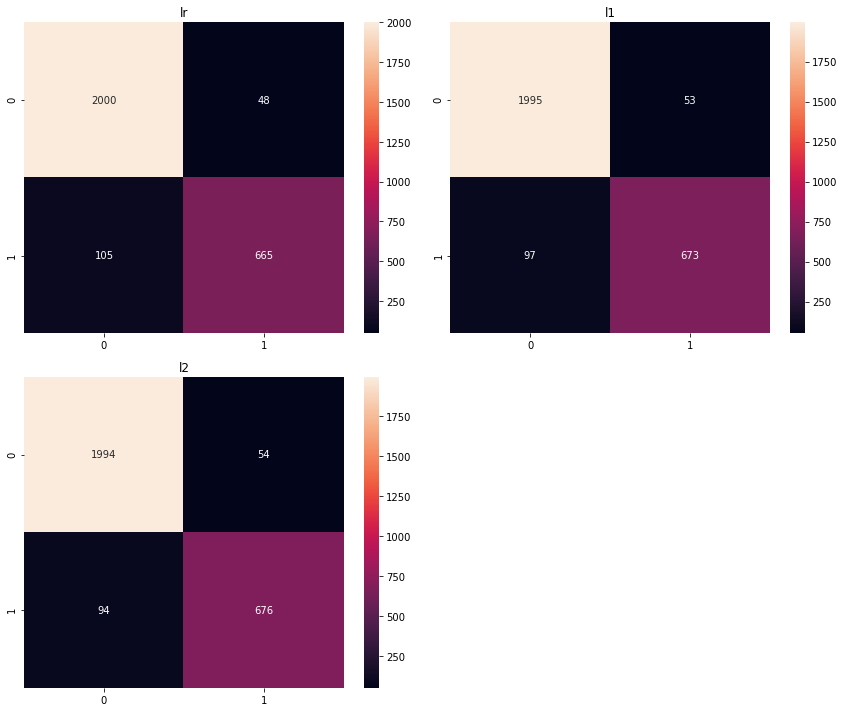

In [42]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

In [43]:
#Using the same training and test set we evaluated K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [44]:
# Estimating KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2048
           1       0.77      0.72      0.74       770

    accuracy                           0.86      2818
   macro avg       0.83      0.82      0.82      2818
weighted avg       0.86      0.86      0.86      2818

Accuracy score:  0.86
F1 Score:  0.74


Text(0.5, 87.0, 'Ground Truth')

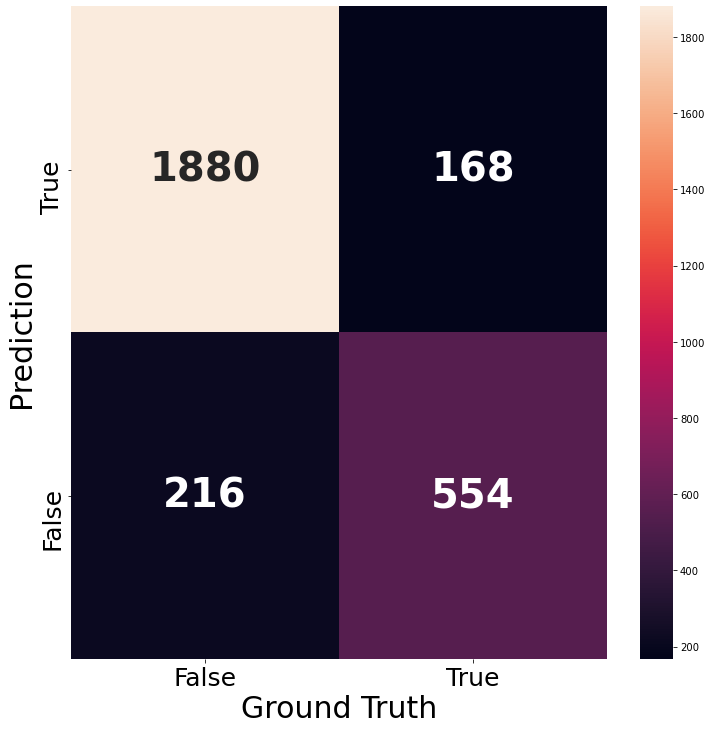

In [45]:
# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

*   Using the same split of training and test samples, estimate another K-Nearest Neighbors model.
*   This time, use K=5 and weight the results by distance.
*   Again, we examined the Precision, Recall, F-1 Score, and Accuracy of the classification, and visualized the Confusion Matrix.

In [46]:
#K-Nearest Neighbors model with K=5 and weight the results by distance
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2048
           1       0.78      0.74      0.76       770

    accuracy                           0.87      2818
   macro avg       0.84      0.83      0.84      2818
weighted avg       0.87      0.87      0.87      2818

Accuracy score:  0.87
F1 Score:  0.76


In [48]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

In [49]:
M_features=X.shape[1]
max_features=round(np.sqrt(M_features))-1
max_features

4

In [50]:
model = RandomForestClassifier( max_features=max_features,n_estimators=20, random_state=0)

In [51]:
model.fit(X_train,y_train)

RandomForestClassifier(max_features=4, n_estimators=20, random_state=0)

In [54]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":accuracy_score(y_test, model.predict(X_test)),"trian Accuracy": accuracy_score(y_train, model.predict(X_train))}
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.9453513129879347, 'trian Accuracy': 0.9971597633136094}


# Discussion
We have evaluated three different models (Logistic Regression, K Nearest Neighbors, Random Forest) for our customer churn dataset. For each case we have calculated Accuracy of the models. In case of K Nearest Neighbors, our result is around 87 percent, however, in case of Logistic Regression and Random Forest our result is around 94 percent which is very impressive.